table of contents  
0. Prepare  
1. Plot the passes and shot leading up to the second and third goals in the match.  
2. Plot all the shots by Player 9 of the home team. Use ad differenct symbol and transparency (alpha) for shots that resulted in goals.  
3. Plot the positions of all players at Player 9's goal.  
4. Calculate how far each player ran.

# Prepare

## import library, and set the path

In [1]:
import os, time, sys, importlib

from tqdm import tqdm

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

cmap = plt.get_cmap('tab10')
%matplotlib inline

sys.path.append(os.path.join('..','src'))
from Metrica_IO import *
from Metrica_Velocities import calc_player_velocities
from Metrica_Viz import *

In [2]:
base_dir = os.path.join('..')
data_dir = os.path.join(base_dir,'..','sample-data','data')

## read dataset

In [3]:
home_df, away_df, events_df = read_match_data(data_dir, 2)

Reading team: home
Reading team: away


In [4]:
home_df, away_df, events_df = to_metric_coordinates(home_df), to_metric_coordinates(away_df), to_metric_coordinates(events_df)

In [5]:
home_df.head()

,Period,Time [s],Home_11_x,Home_11_y,Home_1_x,Home_1_y,Home_2_x,Home_2_y,Home_3_x,Home_3_y,...,Home_10_x,Home_10_y,Home_12_x,Home_12_y,Home_13_x,Home_13_y,Home_14_x,Home_14_y,ball_x,ball_y
Frame,,,,,,,,,,,,,,,,,,,,,
1,1,0.04,46.9315,-0.28084,15.70072,14.5486,18.81712,4.89396,21.07492,-3.81208,...,0.20564,-7.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0.08,46.9315,-0.28084,15.70072,14.5486,18.81712,4.89396,21.07492,-3.81208,...,0.20564,-7.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,0.12,46.9315,-0.28084,15.70072,14.5486,18.81712,4.89396,21.07492,-3.81208,...,0.20564,-7.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,0.16,46.9315,-0.28084,15.70072,14.5486,18.81712,4.89396,21.07492,-3.81208,...,0.20564,-7.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1,0.20,46.9315,-0.28084,15.70072,14.5486,18.81712,4.89396,21.07492,-3.81208,...,0.20564,-7.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
away_df.head()

,Period,Time [s],Away_25_x,Away_25_y,Away_15_x,Away_15_y,Away_16_x,Away_16_y,Away_17_x,Away_17_y,...,Away_22_x,Away_22_y,Away_23_x,Away_23_y,Away_24_x,Away_24_y,Away_26_x,Away_26_y,ball_x,ball_y
Frame,,,,,,,,,,,,,,,,,,,,,
1,1,0.04,-51.70892,-1.19884,-18.13554,-21.65528,-20.42196,-3.52376,-18.8309,7.51128,...,-0.11766,35.53884,0.18762,-0.0986,-0.51198,9.36088,NaN,NaN,NaN,NaN
2,1,0.08,-51.70892,-1.19884,-18.13554,-21.65528,-20.42196,-3.52376,-18.8309,7.51128,...,-0.11766,35.53884,0.18762,-0.0986,-0.51198,9.36088,NaN,NaN,NaN,NaN
3,1,0.12,-51.70892,-1.19884,-18.13554,-21.65528,-20.42196,-3.52376,-18.8309,7.51128,...,-0.11766,35.53884,0.18762,-0.0986,-0.51198,9.36088,NaN,NaN,NaN,NaN
4,1,0.16,-51.70892,-1.19884,-18.19384,-21.65596,-20.42196,-3.52376,-18.8309,7.51128,...,-0.11766,35.53884,0.18762,-0.0986,-0.51198,9.36088,NaN,NaN,NaN,NaN
5,1,0.20,-51.70892,-1.19884,-18.25002,-21.65596,-20.42196,-3.52376,-18.8309,7.51128,...,-0.11766,35.53884,0.18762,-0.0986,-0.51198,9.36088,NaN,NaN,NaN,NaN


In [7]:
events_df.head()

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
0,Away,SET PIECE,KICK OFF,1,51,2.04,51,2.04,Player23,NaN,NaN,NaN,NaN,NaN
1,Away,PASS,NaN,1,51,2.04,87,3.48,Player23,Player20,0.00,-0.00,-10.60,-0.68
2,Away,PASS,NaN,1,146,5.84,186,7.44,Player20,Player18,-7.42,-0.00,-6.36,19.04
3,Away,PASS,NaN,1,248,9.92,283,11.32,Player18,Player17,-3.18,21.08,-20.14,14.96
4,Away,PASS,NaN,1,316,12.64,346,13.84,Player17,Player16,-22.26,12.24,-25.44,-5.44


# Q1.

## Check the Event Dataset

### SHOT'S SubType

In [8]:
events_df[events_df.Type=='SHOT'].Subtype.unique()

array(['OFF TARGET-OUT', 'ON TARGET-GOAL', 'ON TARGET-SAVED', 'BLOCKED',
       'HEAD-OFF TARGET-OUT', 'OFF TARGET-HEAD-OUT',
       'HEAD-ON TARGET-GOAL'], dtype=object)

### ON TARGET-GOAL's rows

In [9]:
events_df[(events_df.Type=='SHOT')&(events_df.Subtype.str.contains('ON TARGET-GOAL'))]

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
198,Home,SHOT,ON TARGET-GOAL,1,12202,488.08,12212,488.48,Player10,NaN,-47.70,-3.40,-54.06,-2.04
823,Away,SHOT,ON TARGET-GOAL,1,53049,2121.96,53075,2123.00,Player24,NaN,44.52,2.72,54.06,1.36
1118,Home,SHOT,HEAD-ON TARGET-GOAL,2,73983,2959.32,73995,2959.80,Player9,NaN,47.70,-1.36,54.06,-2.04
1671,Away,SHOT,ON TARGET-GOAL,2,115009,4600.36,115024,4600.96,Player20,NaN,-40.28,-1.36,-55.12,-2.72
1723,Home,SHOT,ON TARGET-GOAL,2,121027,4841.08,121055,4842.20,Player12,NaN,30.74,-5.44,54.06,-2.72


## Get All Pass before the each second and third goals, and Plot

In [10]:
goal_index_list = events_df[(events_df.Type=='SHOT')&(events_df.Subtype.str.contains('ON TARGET-GOAL'))].index.tolist()[1:3]

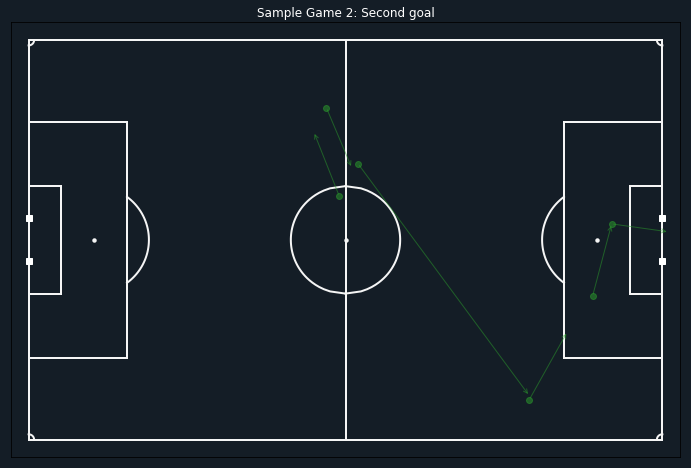

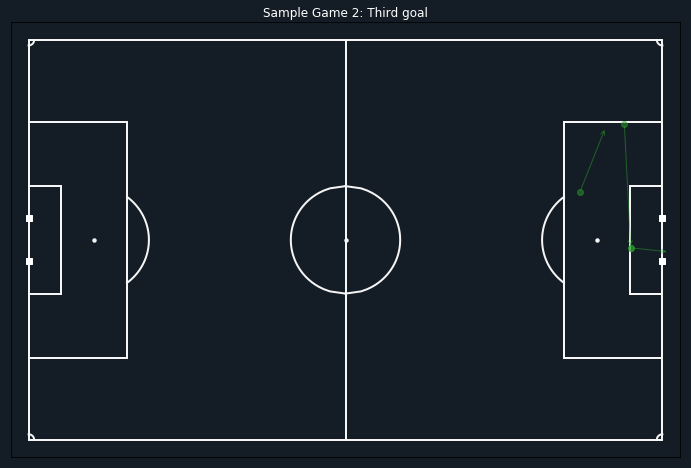

In [11]:
title_org = f'Sample Game 2'
name_list = ['Second', 'Third']
for name, goal_index in zip(name_list, goal_index_list):
    title = f'{title_org}: {name} goal'
    recovery_index = events_df[(events_df.index <= goal_index)&(events_df.Type=='RECOVERY')].index.tolist()[-1]

    (fig,ax) = plot_pitch(field_color='twitter_dark_mode')
    plot_events(events_df.iloc[recovery_index+1:goal_index+1], (fig,ax), color=cmap(2), annotate=False)

    ax.set_title(title, color='white')


# Q2.

## Check all the shots by Player 9 of the home team

In [12]:
events_df_tmp = events_df[(events_df.From=='Player9')&(events_df.Type=='SHOT')&(events_df.Team=='Home')]

In [13]:
events_df_tmp.head()

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
1118,Home,SHOT,HEAD-ON TARGET-GOAL,2,73983,2959.32,73995,2959.8,Player9,NaN,47.70,-1.36,54.06,-2.04
1681,Home,SHOT,HEAD-OFF TARGET-OUT,2,117218,4688.72,117245,4689.8,Player9,NaN,41.34,-7.48,54.06,5.44
1756,Home,SHOT,HEAD-OFF TARGET-OUT,2,124336,4973.44,124365,4974.6,Player9,NaN,45.58,-0.00,55.12,-7.48
1927,Home,SHOT,ON TARGET-SAVED,2,139891,5595.64,139925,5597.0,Player9,NaN,21.20,-1.36,50.88,-1.36


In [14]:
events_df_tmp.Subtype.unique()

array(['HEAD-ON TARGET-GOAL', 'HEAD-OFF TARGET-OUT', 'ON TARGET-SAVED'],
      dtype=object)

## plot

In [15]:
color_dict = {subtype:cmap(i) for i, subtype in enumerate(events_df_tmp.Subtype.unique().tolist())}

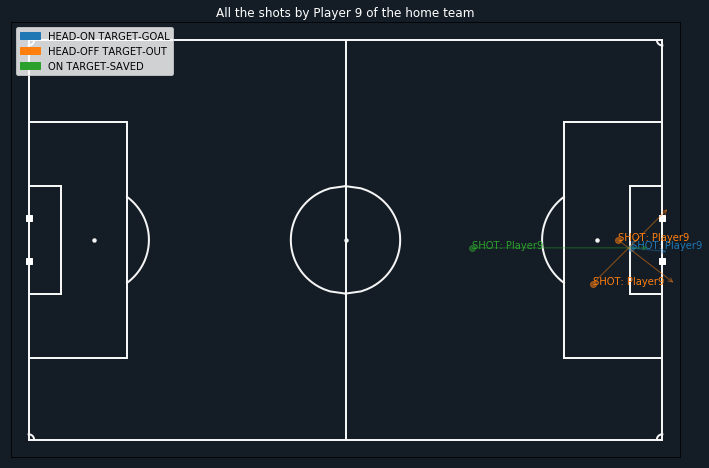

In [16]:
(fig,ax) = plot_pitch(field_color='twitter_dark_mode')

for subtype in events_df_tmp.Subtype.unique().tolist():
    plot_events(events_df_tmp[events_df_tmp.Subtype==subtype], (fig,ax), color=color_dict[subtype], annotate=True)

# add legend
import matplotlib.patches as mpatches

patch_list = [mpatches.Patch(color=v, label=k) for k, v in color_dict.items()]

ax.set_title('All the shots by Player 9 of the home team', color='white')
plt.legend(handles=patch_list, loc='upper left')

# Q3. 

In [17]:
start_time_array = events_df_tmp[events_df_tmp.Subtype.str.contains('TARGET-GOAL')]['Start Time [s]'].values

In [18]:
start_time_array

array([2959.32])

Text(0.5,1,"the positions of all players at Player's goal, Time [s] == 2959.32")

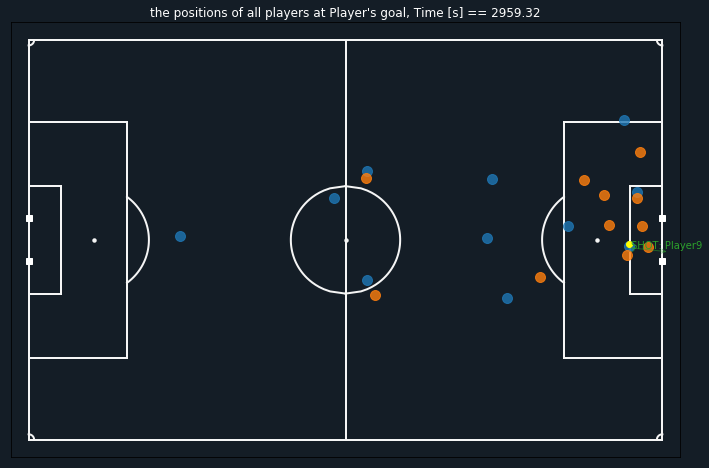

In [19]:
tm = start_time_array[0]

(fig,ax) = plot_pitch(field_color='twitter_dark_mode')
plot_events(events_df_tmp[events_df_tmp['Start Time [s]']==tm], (fig,ax), color=cmap(2), annotate=True)
plot_frame(home_df[home_df['Time [s]']==tm], away_df[away_df['Time [s]']==tm], (fig,ax), team_colors=(cmap(0), cmap(1)), PlayerAlpha=0.8)

ax.set_title(f'the positions of all players at Player\'s goal, Time [s] == {tm}', color='white')

# Q4. 

## define utility function

In [20]:
def calc_distance_each_player(tracking_df):
    c_list = tracking_df.columns.tolist()[2:-2]
    diff_df = tracking_df[c_list].diff()

    player_name_list = list(set([c.replace('_x','').replace('_y','') for c in c_list]))

    for player_name in tqdm(player_name_list):
        c_list_tmp = [c for c in diff_df.columns.tolist() if c.startswith(player_name)]
        diff_df[f'{player_name}_distance'] = diff_df[c_list_tmp].apply(lambda xy: np.sqrt(xy[0]**2+xy[1]**2), axis=1)

    c_list_tmp = [c for c in diff_df.columns.tolist() if c.endswith('_distance')]
    distance_summary = diff_df[c_list_tmp].sum()
    
    return distance_summary

## process

### process for home

In [21]:
home_distance_summary = calc_distance_each_player(home_df)

100%|██████████| 14/14 [00:59<00:00,  4.44s/it]


### process for away

In [22]:
away_distance_summary = calc_distance_each_player(away_df)

100%|██████████| 12/12 [00:51<00:00,  4.60s/it]


## plot

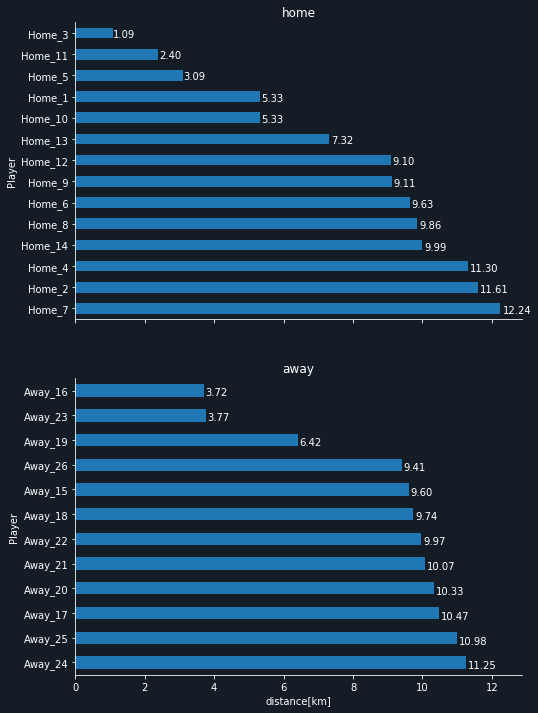

In [24]:
# set matplotlib properties
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['axes.edgecolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

# instance
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 6*2), sharex=True)

# set color
for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

twitter_color = '#141d26'
fig.patch.set_facecolor(twitter_color)
for ax in axes:
    ax.set_facecolor(twitter_color)

ax = axes[0]
ax.set_title('home')
(home_distance_summary.sort_values(ascending=False)/1000).plot.barh(ax=ax, color=cmap(0))
ax.set_yticklabels([c.replace('_distance','') for c in home_distance_summary.index.tolist()])

ax = axes[1]
ax.set_title('away')
(away_distance_summary.sort_values(ascending=False)/1000).plot.barh(ax=ax, color=cmap(0))
ax.set_yticklabels([c.replace('_distance','') for c in away_distance_summary.index.tolist()])

for ax in axes:
    ax.set_xlabel('distance[km]'); ax.set_ylabel('Player')
    for p in ax.patches:
        ax.annotate(f'{p.get_width():.2f}', (p.get_width() * 1.005, p.get_y() * 1.005), fontsize=10)